In [1]:
import math
import copy
import networkx as nx


def hierarchical_cluster(tuples, linkage_func):
    
    #make a matrix to keep track of euclidean distances
    dist_matrix = []
    #Not pretty, but I know it works to make the right size matrix
    clusters = copy.deepcopy(tuples)
    for i in clusters:
        row = []
        for j in tuples:
            row.append(0)
        dist_matrix.append(row)
    
    #populate the matrix
    for cord1 in clusters:
        for cord2 in tuples:
            index1 = tuples.index(cord1)
            index2 = tuples.index(cord2)
            dist_matrix[index1][index2]=math.dist(cord1, cord2)
            
    #Create a graph to record the hierarchy
    gr = nx.Graph()
    graph_build = []
   
    #loop through, make clusters and add to graph
    while True:
        #find smallest distance, record clusters
        smallest = 10**1000
        
        closest_clusters = [0,0]
        for item in dist_matrix:
            for distance in item:
                if distance < smallest and distance != 0:
                    #record distance, and clusters attached
                    smallest = distance
                    closest_clusters[0] = clusters[dist_matrix.index(item)]
                    closest_clusters[1] = clusters[item.index(distance)]
        
        #update the 'clusters' list
        clusters.remove(closest_clusters[0])
        clusters.remove(closest_clusters[1])
        add_cluster=[]
        if type(closest_clusters[0]) is tuple:
            add_cluster.append(closest_clusters[0])
        else:
            for i in closest_clusters[0]:
                add_cluster.append(i)
        if type(closest_clusters[1]) is tuple:
            add_cluster.append(closest_clusters[1])
        else:
            for i in closest_clusters[1]:
                add_cluster.append(i)
        clusters.append(add_cluster)
        
        #I'll need the order to build the graph at the end
        graph_build.append(add_cluster)
        
        #recalculate matrix using passed function
        dist_matrix = linkage_func(clusters)
        #end loop if clusters is one big element
        if len(clusters)<2:
            break
    
    #Time to build the graph and draw/return it
    seen = {}
    hierarchy_counter=0
    for item in graph_build:
        hierarchy_counter += 1
        if len(item) == 2:
            #add the nodes/edges and update the dictionary
            gr.add_node(item[0])
            gr.add_node(item[1])
            gr.add_node(hierarchy_counter)
            gr.add_edge(item[0],hierarchy_counter)
            gr.add_edge(item[1],hierarchy_counter)
            seen[item[0]]=hierarchy_counter
            seen[item[1]]=hierarchy_counter
        else:
            #Multiple items, we have to check for which have node parents
            gr.add_node(hierarchy_counter)
            for cluster in item:
                if cluster not in seen.keys():
                    gr.add_node(cluster)
                    gr.add_edge(cluster, hierarchy_counter)
                    seen[cluster]=hierarchy_counter
                else:
                    node_connection=seen[cluster]
                    gr.add_edge(node_connection, hierarchy_counter)
                seen[cluster]=hierarchy_counter
                    
    
    nx.draw(gr, with_labels=True)
    return graph_build



#Single_linkage, which calculates the pairwise distance between the closest elements of each cluster

def single_linkage(cluster_list):
    double_list=copy.deepcopy(cluster_list)
    
    #make a matrix to keep track of euclidean distances
    dist_matrix = []
    #Not pretty, but I know it works to make the right size matrix
    for i in cluster_list:
        row = []
        for j in double_list:
            row.append(0)
        dist_matrix.append(row)
    #quadruple for loop, for ensuring coverage... we want the smallest euclidean distance
    for cluster in cluster_list:
        for other_cluster in double_list:
            #Update one matrix value per cluster comparison
            smallest=1000
            if cluster_list.index(cluster) != double_list.index(other_cluster):
                #They could be single point tuple clusters or multiple point clusters
                if type(cluster) is list and type(other_cluster) is list:
                    for i in cluster:
                        for j in other_cluster:
                            distance=math.dist(i,j)
                            if distance<smallest:
                                smallest=distance
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=smallest
                    
                elif type(cluster) is not list and type(other_cluster) is not list:
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=math.dist(cluster, other_cluster)
                    
                elif type(cluster) is list and type(other_cluster) is not list:
                    for i in cluster:
                        distance=math.dist(i,other_cluster)
                        if distance<smallest:
                            smallest=distance
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=smallest
                
                elif type(cluster) is not list and type(other_cluster) is list:
                    for j in other_cluster:
                        distance=math.dist(cluster,j)
                        if distance<smallest:
                            smallest=distance
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=smallest
    return dist_matrix
                    

[[(1, 2), (2, 3)],
 [(9, 10), (8, 9)],
 [(1, 2), (2, 3), (9, 10), (8, 9)],
 [(17, 19), (1, 2), (2, 3), (9, 10), (8, 9)]]

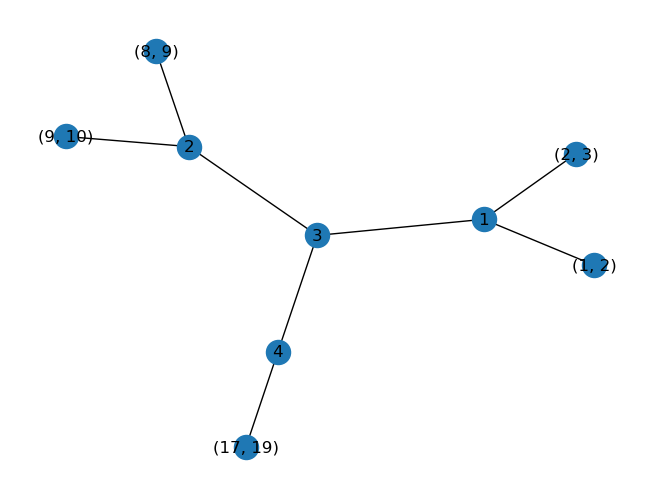

In [2]:
multi_nums=[(1,2), (2,3), (9,10), (8,9), (17,19)]

hierarchical_cluster(multi_nums, single_linkage)

[[(1, 2), (2, 3)],
 [(9, 10), (8, 9)],
 [(0, 3), (1, 2), (2, 3)],
 [(4, 7), (2, 7)],
 [(3, 5), (0, 3), (1, 2), (2, 3)],
 [(4, 7), (2, 7), (3, 5), (0, 3), (1, 2), (2, 3)],
 [(7, 4), (4, 7), (2, 7), (3, 5), (0, 3), (1, 2), (2, 3)],
 [(9, 10), (8, 9), (7, 4), (4, 7), (2, 7), (3, 5), (0, 3), (1, 2), (2, 3)],
 [(17, 19),
  (9, 10),
  (8, 9),
  (7, 4),
  (4, 7),
  (2, 7),
  (3, 5),
  (0, 3),
  (1, 2),
  (2, 3)]]

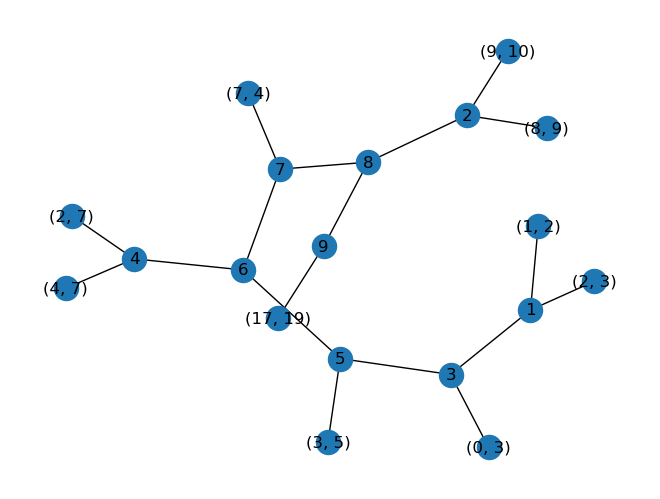

In [3]:
other_nums=[(1,2), (2,3), (9,10), (8,9), (17,19), (4,7), (2,7), (3,5), (0,3), (7,4)]

hierarchical_cluster(other_nums, single_linkage)



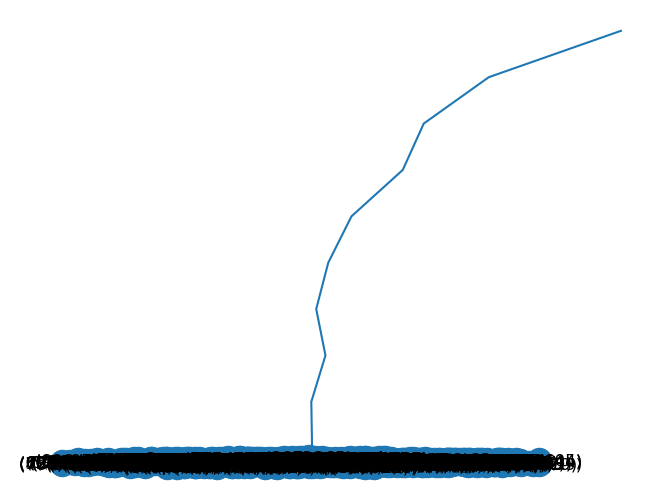

In [20]:
#Runtime analysis on increasing inputs
import time
import random
import matplotlib.pyplot as plt
import numpy as np

def big_square_tuples_list(n):
    
    tuples = []
    for i in range (n):
        a = random.randrange(0, 1000)
        b = random.randrange(0, 1000)
        tuples.append((a,b))
        
    return tuples
x=[]
y=[]
for i in range(10):
    start = time.time()
    hierarchical_cluster(big_square_tuples_list(i*10+3), single_linkage)
    end = time.time()
    runtime=end-start
    
    x.append(runtime)
    y.append(i*10+3)
    
plt.plot(x,y)
plt.show()


In [ ]:
#The code above will not work. Conor's beautiful testing methods want a thousand points clustered each, and the above
#algorithm above has a time complexity of O(n^3), and computes an n^2 matrix every time it runs. Even if I just 
#updated the way I recalculated the matrix, it would still require an ~n^2 search of the matrix at every step,
#resulting in O(n^3)

#Lets limit the time complexity to the one initial n^2 computation in the beginning, and work the 2d array
#instead of rebuilding it

#Hierarchu_cluster_dissimilarity - computes arrays of closest neighbors and those distances in addition to the pairwise
#distance matrix, uses single linkage to cluster
def hierarchy_cluster_dissimilarity(tuples):
    #make matrix of pairwise distances, and arrays
    dist_matrix = []
    #Not pretty, but I know it works to make the right size matrix
    point_list = copy.deepcopy(tuples)
    for i in point_list:
        row = []
        for j in tuples:
            row.append(0)
        dist_matrix.append(row)
    #Now the arrays
    #near_neighbor, the closest neighbor's index
    near_neighbors=[]
    #distances to the nearest neighbor indicated in near_neighbors
    nn_distances=[]
    
    #populate the matrix, keep track of smallest cord1
    for cord1 in point_list:
        smallest_cord1 = 10**10
        smallest_index=0
        for cord2 in tuples:
            index1 = tuples.index(cord1)
            index2 = tuples.index(cord2)
            if index1 != index2:
                dist_matrix[index1][index2]=math.dist(cord1, cord2)
                if dist_matrix[index1][index2] < smallest_cord1:
                    smallest_cord1 = dist_matrix[index1][index2]
                    smallest_index = index2
        #populate the arrays for distance and nearest neighbor
        near_neighbors.append(smallest_index)
        nn_distances.append(smallest_cord1)
    
    #Now all our data structures are populated, we set up our main loop and initialize the clusters list
    clusters=tuples
    for hierarchy in range(len(tuples)):
        #find smallest distance in nn_distances
        smallest_dist = min(nn_distances)
        print(smallest_dist)
        #figure out which nodes are being clustered
        node_index=nn_distances.index(smallest_dist)
        closest_neighbor_index=near_neighbors[node_index]
        
        print("iteration:")
        print(hierarchy)
        print(closest_neighbor_index)
        print(node_index)
        
        
        #Record so that I can dendro-plot
  
        
        #update the columns of the matrix and keep track of the smallest distance for the array
        nearest_neighbor=0
        near_dist=10**10
        for i in range(len(dist_matrix[node_index])):
            if dist_matrix[node_index][i] > dist_matrix[closest_neighbor_index][i] and dist_matrix[closest_neighbor_index][i]!=0:
                dist_matrix[node_index][i] = dist_matrix[closest_neighbor_index][i]
            #if its not bigger, we can leave it as is
            
            #check if its the smallest
            if dist_matrix[node_index][i]<near_dist and node_index!=i:
                near_dist=dist_matrix[node_index][i]
                nearest_neighbor=i  
            print(dist_matrix)
        #remove bad column
        del(dist_matrix[closest_neighbor_index])
        print("final:")
        print(dist_matrix)
       
        print(node_index)
        print(closest_neighbor_index)
              
         #update rows, watch out for missing value from column deletion
        for i in range(len(dist_matrix[0])-1):
            if dist_matrix[i][node_index] > dist_matrix[i][closest_neighbor_index] and \
            dist_matrix[i][closest_neighbor_index]!=0:
                dist_matrix[i][node_index] = dist_matrix[i][closest_neighbor_index]
            #Remove the bad row
            del(dist_matrix[i][closest_neighbor_index])
        
        #Update the arrays
        near_neighbors.pop(closest_neighbor_index)
        nn_distances.pop(closest_neighbor_index)
        near_neighbors[node_index]=nearest_neighbor
        nn_distances[node_index]=near_dist
        
        #need to update the references in neighbors list
        for i in range(len(near_neighbors)):
            if near_neighbors[i]>node_index:
                i-=1
                
    return 0
        

